# Disco Diffusion v5.2 - Now with VR Mode

In case of confusion, Disco is the name of this notebook edit. The diffusion model in use is Katherine Crowson's fine-tuned 512x512 model

For issues, join the [Disco Diffusion Discord](https://discord.gg/msEZBy4HxA) or message us on twitter at [@somnai_dreams](https://twitter.com/somnai_dreams) or [@gandamu](https://twitter.com/gandamu_ml)

### Credits & Changelog ⬇️

#### Credits

Original notebook by Katherine Crowson (https://github.com/crowsonkb, https://twitter.com/RiversHaveWings). It uses either OpenAI's 256x256 unconditional ImageNet or Katherine Crowson's fine-tuned 512x512 diffusion model (https://github.com/openai/guided-diffusion), together with CLIP (https://github.com/openai/CLIP) to connect text prompts with images.

Modified by Daniel Russell (https://github.com/russelldc, https://twitter.com/danielrussruss) to include (hopefully) optimal params for quick generations in 15-100 timesteps rather than 1000, as well as more robust augmentations.

Further improvements from Dango233 and nsheppard helped improve the quality of diffusion in general, and especially so for shorter runs like this notebook aims to achieve.

Vark added code to load in multiple Clip models at once, which all prompts are evaluated against, which may greatly improve accuracy.

The latest zoom, pan, rotation, and keyframes features were taken from Chigozie Nri's VQGAN Zoom Notebook (https://github.com/chigozienri, https://twitter.com/chigozienri)

Advanced DangoCutn Cutout method is also from Dango223.

--

Disco:

Somnai (https://twitter.com/Somnai_dreams) added Diffusion Animation techniques, QoL improvements and various implementations of tech and techniques, mostly listed in the changelog below.

3D animation implementation added by Adam Letts (https://twitter.com/gandamu_ml) in collaboration with Somnai. Creation of disco.py and ongoing maintenance.

Turbo feature by Chris Allen (https://twitter.com/zippy731)

Improvements to ability to run on local systems, Windows support, and dependency installation by HostsServer (https://twitter.com/HostsServer)

VR Mode by Tom Mason (https://twitter.com/nin_artificial)

#### License

Licensed under the MIT License

Copyright (c) 2021 Katherine Crowson 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

--

MIT License

Copyright (c) 2019 Intel ISL (Intel Intelligent Systems Lab)

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

--

Licensed under the MIT License

Copyright (c) 2021 Maxwell Ingham

Copyright (c) 2022 Adam Letts 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

#### Changelog

In [1]:
#@title <- View Changelog
skip_for_run_all = True #@param {type: 'boolean'}

if skip_for_run_all == False:
  print(
      '''
  v1 Update: Oct 29th 2021 - Somnai

      QoL improvements added by Somnai (@somnai_dreams), including user friendly UI, settings+prompt saving and improved google drive folder organization.

  v1.1 Update: Nov 13th 2021 - Somnai

      Now includes sizing options, intermediate saves and fixed image prompts and perlin inits. unexposed batch option since it doesn't work

  v2 Update: Nov 22nd 2021 - Somnai

      Initial addition of Katherine Crowson's Secondary Model Method (https://colab.research.google.com/drive/1mpkrhOjoyzPeSWy2r7T8EYRaU7amYOOi#scrollTo=X5gODNAMEUCR)

      Noticed settings were saving with the wrong name so corrected it. Let me know if you preferred the old scheme.

  v3 Update: Dec 24th 2021 - Somnai

      Implemented Dango's advanced cutout method

      Added SLIP models, thanks to NeuralDivergent

      Fixed issue with NaNs resulting in black images, with massive help and testing from @Softology

      Perlin now changes properly within batches (not sure where this perlin_regen code came from originally, but thank you)

  v4 Update: Jan 2021 - Somnai

      Implemented Diffusion Zooming

      Added Chigozie keyframing

      Made a bunch of edits to processes
  
  v4.1 Update: Jan  14th 2021 - Somnai

      Added video input mode

      Added license that somehow went missing

      Added improved prompt keyframing, fixed image_prompts and multiple prompts

      Improved UI

      Significant under the hood cleanup and improvement

      Refined defaults for each mode

      Added latent-diffusion SuperRes for sharpening

      Added resume run mode

  v4.9 Update: Feb 5th 2022 - gandamu / Adam Letts

      Added 3D

      Added brightness corrections to prevent animation from steadily going dark over time

  v4.91 Update: Feb 19th 2022 - gandamu / Adam Letts

      Cleaned up 3D implementation and made associated args accessible via Colab UI elements

  v4.92 Update: Feb 20th 2022 - gandamu / Adam Letts

      Separated transform code

  v5.01 Update: Mar 10th 2022 - gandamu / Adam Letts

      IPython magic commands replaced by Python code

  v5.1 Update: Mar 30th 2022 - zippy / Chris Allen and gandamu / Adam Letts

      Integrated Turbo+Smooth features from Disco Diffusion Turbo -- just the implementation, without its defaults.

      Implemented resume of turbo animations in such a way that it's now possible to resume from different batch folders and batch numbers.

      3D rotation parameter units are now degrees (rather than radians)

      Corrected name collision in sampling_mode (now diffusion_sampling_mode for plms/ddim, and sampling_mode for 3D transform sampling)

      Added video_init_seed_continuity option to make init video animations more continuous

  v5.1 Update: Apr 4th 2022 - MSFTserver aka HostsServer

      Removed pytorch3d from needing to be compiled with a lite version specifically made for Disco Diffusion

      Remove Super Resolution

      Remove SLIP Models

      Update for crossplatform support

  v5.2 Update: Apr 10th 2022 - nin_artificial / Tom Mason

      VR Mode

      '''
  )

# Tutorial

**Diffusion settings (Defaults are heavily outdated)**
---
Disco Diffusion is complex, and continually evolving with new features.  The most current documentation on on Disco Diffusion settings can be found in the unofficial guidebook:

[Zippy's Disco Diffusion Cheatsheet](https://docs.google.com/document/d/1l8s7uS2dGqjztYSjPpzlmXLjl5PM3IGkRWI3IiCuK7g/edit)

We also encourage users to join the [Disco Diffusion User Discord](https://discord.gg/XGZrFFCRfN) to learn from the active user community.

This section below is outdated as of v2

Setting | Description | Default
--- | --- | ---
**Your vision:**
`text_prompts` | A description of what you'd like the machine to generate. Think of it like writing the caption below your image on a website. | N/A
`image_prompts` | Think of these images more as a description of their contents. | N/A
**Image quality:**
`clip_guidance_scale`  | Controls how much the image should look like the prompt. | 1000
`tv_scale` | Controls the smoothness of the final output. | 150
`range_scale` | Controls how far out of range RGB values are allowed to be. | 150
`sat_scale` | Controls how much saturation is allowed. From nshepperd's JAX notebook. | 0
`cutn` | Controls how many crops to take from the image. | 16
`cutn_batches` | Accumulate CLIP gradient from multiple batches of cuts. | 2
**Init settings:**
`init_image` | URL or local path | None
`init_scale` | This enhances the effect of the init image, a good value is 1000 | 0
`skip_steps` | Controls the starting point along the diffusion timesteps | 0
`perlin_init` | Option to start with random perlin noise | False
`perlin_mode` | ('gray', 'color') | 'mixed'
**Advanced:**
`skip_augs` | Controls whether to skip torchvision augmentations | False
`randomize_class` | Controls whether the imagenet class is randomly changed each iteration | True
`clip_denoised` | Determines whether CLIP discriminates a noisy or denoised image | False
`clamp_grad` | Experimental: Using adaptive clip grad in the cond_fn | True
`seed`  | Choose a random seed and print it at end of run for reproduction | random_seed
`fuzzy_prompt` | Controls whether to add multiple noisy prompts to the prompt losses | False
`rand_mag` | Controls the magnitude of the random noise | 0.1
`eta` | DDIM hyperparameter | 0.5

..

**Model settings**
---

Setting | Description | Default
--- | --- | ---
**Diffusion:**
`timestep_respacing` | Modify this value to decrease the number of timesteps. | ddim100
`diffusion_steps` || 1000
**Diffusion:**
`clip_models` | Models of CLIP to load. Typically the more, the better but they all come at a hefty VRAM cost. | ViT-B/32, ViT-B/16, RN50x4

# 1. Set Up

In [2]:
#@title 1.1 Check GPU Status
import subprocess
simple_nvidia_smi_display = False#@param {type:"boolean"}
if simple_nvidia_smi_display:
  #!nvidia-smi
  nvidiasmi_output = subprocess.run(['nvidia-smi', '-L'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(nvidiasmi_output)
else:
  #!nvidia-smi -i 0 -e 0
  nvidiasmi_output = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(nvidiasmi_output)
  nvidiasmi_ecc_note = subprocess.run(['nvidia-smi', '-i', '0', '-e', '0'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(nvidiasmi_ecc_note)

Sun Apr 24 14:24:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.52       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| 37%   53C    P8    10W / 350W |      0MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:02:00.0  On |                  N/A |
| 28%   

In [3]:
#@title 1.2 Prepare Folders
import subprocess, os, sys, ipykernel

def gitclone(url):
  res = subprocess.run(['git', 'clone', url], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(res)

def pipi(modulestr):
  res = subprocess.run(['pip', 'install', modulestr], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(res)

def pipie(modulestr):
  res = subprocess.run(['git', 'install', '-e', modulestr], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(res)

def wget(url, outputdir):
  res = subprocess.run(['wget', url, '-P', f'{outputdir}'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(res)

try:
    from google.colab import drive
    print("Google Colab detected. Using Google Drive.")
    is_colab = True
    #@markdown If you connect your Google Drive, you can save the final image of each run on your drive.
    google_drive = True #@param {type:"boolean"}
    #@markdown Click here if you'd like to save the diffusion model checkpoint file to (and/or load from) your Google Drive:
    save_models_to_google_drive = True #@param {type:"boolean"}
except:
    is_colab = False
    google_drive = False
    save_models_to_google_drive = False
    print("Google Colab not detected.")

if is_colab:
    if google_drive is True:
        drive.mount('/content/drive')
        root_path = '/content/drive/MyDrive/AI/Disco_Diffusion'
    else:
        root_path = '/content'
else:
    root_path = os.getcwd()

import os
def createPath(filepath):
    os.makedirs(filepath, exist_ok=True)

initDirPath = f'{root_path}/init_images'
createPath(initDirPath)
outDirPath = f'{root_path}/images_out'
createPath(outDirPath)

if is_colab:
    if google_drive and not save_models_to_google_drive or not google_drive:
        model_path = '/content/models'
        createPath(model_path)
    if google_drive and save_models_to_google_drive:
        model_path = f'{root_path}/models'
        createPath(model_path)
else:
    model_path = f'{root_path}/models'
    createPath(model_path)

# libraries = f'{root_path}/libraries'
# createPath(libraries)

Google Colab not detected.


In [4]:
#@title ### 1.3 Install and import dependencies

import pathlib, shutil, os, sys

if not is_colab:
  # If running locally, there's a good chance your env will need this in order to not crash upon np.matmul() or similar operations.
  os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

PROJECT_DIR = os.path.abspath(os.getcwd())
USE_ADABINS = True

if is_colab:
  if google_drive is not True:
    root_path = f'/content'
    model_path = '/content/models' 
else:
  root_path = os.getcwd()
  model_path = f'{root_path}/models'

model_256_downloaded = False
model_512_downloaded = False
model_secondary_downloaded = False

multipip_res = subprocess.run(['pip', 'install', 'lpips', 'datetime', 'timm', 'ftfy', 'einops', 'pytorch-lightning', 'omegaconf'], stdout=subprocess.PIPE).stdout.decode('utf-8')
print(multipip_res)

if is_colab:
  subprocess.run(['apt', 'install', 'imagemagick'], stdout=subprocess.PIPE).stdout.decode('utf-8')

try:
  from CLIP import clip
except:
  if not os.path.exists("CLIP"):
    gitclone("https://github.com/openai/CLIP")
  sys.path.append(f'{PROJECT_DIR}/CLIP')

try:
  from guided_diffusion.script_util import create_model_and_diffusion
except:
  if not os.path.exists("guided-diffusion"):
    gitclone("https://github.com/crowsonkb/guided-diffusion")
  sys.path.append(f'{PROJECT_DIR}/guided-diffusion')

try:
  from resize_right import resize
except:
  if not os.path.exists("ResizeRight"):
    gitclone("https://github.com/assafshocher/ResizeRight.git")
  sys.path.append(f'{PROJECT_DIR}/ResizeRight')

try:
  import py3d_tools
except:
  if not os.path.exists('pytorch3d-lite'):
    gitclone("https://github.com/MSFTserver/pytorch3d-lite.git")
  sys.path.append(f'{PROJECT_DIR}/pytorch3d-lite')

try:
  from midas.dpt_depth import DPTDepthModel
except:
  if not os.path.exists('MiDaS'):
    gitclone("https://github.com/isl-org/MiDaS.git")
  if not os.path.exists('MiDaS/midas_utils.py'):
    shutil.move('MiDaS/utils.py', 'MiDaS/midas_utils.py')
  if not os.path.exists(f'{model_path}/dpt_large-midas-2f21e586.pt'):
    wget("https://github.com/intel-isl/DPT/releases/download/1_0/dpt_large-midas-2f21e586.pt", model_path)
  sys.path.append(f'{PROJECT_DIR}/MiDaS')

try:
  sys.path.append(PROJECT_DIR)
  import disco_xform_utils as dxf
except:
  if not os.path.exists("disco-diffusion"):
    gitclone("https://github.com/alembics/disco-diffusion.git")
  if os.path.exists('disco_xform_utils.py') is not True:
    shutil.move('disco-diffusion/disco_xform_utils.py', 'disco_xform_utils.py')
  sys.path.append(PROJECT_DIR)

import torch
from dataclasses import dataclass
from functools import partial
import cv2
import pandas as pd
import gc
import io
import math
import timm
from IPython import display
import lpips
from PIL import Image, ImageOps
import requests
from glob import glob
import json
from types import SimpleNamespace
from torch import nn
from torch.nn import functional as F
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from tqdm.notebook import tqdm
from CLIP import clip
from resize_right import resize
from guided_diffusion.script_util import create_model_and_diffusion, model_and_diffusion_defaults
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
from ipywidgets import Output
import hashlib
from functools import partial
if is_colab:
  os.chdir('/content')
  from google.colab import files
else:
  os.chdir(f'{PROJECT_DIR}')
from IPython.display import Image as ipyimg
from numpy import asarray
from einops import rearrange, repeat
import torch, torchvision
import time
from omegaconf import OmegaConf
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# AdaBins stuff
if USE_ADABINS:
  try:
    from infer import InferenceHelper
  except:
    if os.path.exists("AdaBins") is not True:
      gitclone("https://github.com/shariqfarooq123/AdaBins.git")
    if not os.path.exists(f'{PROJECT_DIR}/pretrained/AdaBins_nyu.pt'):
      createPath(f'{PROJECT_DIR}/pretrained')
      wget("https://cloudflare-ipfs.com/ipfs/Qmd2mMnDLWePKmgfS8m6ntAg4nhV5VkUyAydYBp8cWWeB7/AdaBins_nyu.pt", f'{PROJECT_DIR}/pretrained')
    sys.path.append(f'{PROJECT_DIR}/AdaBins')
  from infer import InferenceHelper
  MAX_ADABINS_AREA = 500000

import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', DEVICE)
device = DEVICE # At least one of the modules expects this name..

if torch.cuda.get_device_capability(DEVICE) == (8,0): ## A100 fix thanks to Emad
  print('Disabling CUDNN for A100 gpu', file=sys.stderr)
  torch.backends.cudnn.enabled = False

disco_xform_utils.py failed to import InferenceHelper. Please ensure that AdaBins directory is in the path (i.e. via sys.path.append('./AdaBins') or other means).
Using device: cuda:0


In [5]:
#@title ### 1.4 Define Midas functions

from midas.dpt_depth import DPTDepthModel
from midas.midas_net import MidasNet
from midas.midas_net_custom import MidasNet_small
from midas.transforms import Resize, NormalizeImage, PrepareForNet

# Initialize MiDaS depth model.
# It remains resident in VRAM and likely takes around 2GB VRAM.
# You could instead initialize it for each frame (and free it after each frame) to save VRAM.. but initializing it is slow.
default_models = {
    "midas_v21_small": f"{model_path}/midas_v21_small-70d6b9c8.pt",
    "midas_v21": f"{model_path}/midas_v21-f6b98070.pt",
    "dpt_large": f"{model_path}/dpt_large-midas-2f21e586.pt",
    "dpt_hybrid": f"{model_path}/dpt_hybrid-midas-501f0c75.pt",
    "dpt_hybrid_nyu": f"{model_path}/dpt_hybrid_nyu-2ce69ec7.pt",}


def init_midas_depth_model(midas_model_type="dpt_large", optimize=True):
    midas_model = None
    net_w = None
    net_h = None
    resize_mode = None
    normalization = None

    print(f"Initializing MiDaS '{midas_model_type}' depth model...")
    # load network
    midas_model_path = default_models[midas_model_type]

    if midas_model_type == "dpt_large": # DPT-Large
        midas_model = DPTDepthModel(
            path=midas_model_path,
            backbone="vitl16_384",
            non_negative=True,
        )
        net_w, net_h = 384, 384
        resize_mode = "minimal"
        normalization = NormalizeImage(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    elif midas_model_type == "dpt_hybrid": #DPT-Hybrid
        midas_model = DPTDepthModel(
            path=midas_model_path,
            backbone="vitb_rn50_384",
            non_negative=True,
        )
        net_w, net_h = 384, 384
        resize_mode="minimal"
        normalization = NormalizeImage(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    elif midas_model_type == "dpt_hybrid_nyu": #DPT-Hybrid-NYU
        midas_model = DPTDepthModel(
            path=midas_model_path,
            backbone="vitb_rn50_384",
            non_negative=True,
        )
        net_w, net_h = 384, 384
        resize_mode="minimal"
        normalization = NormalizeImage(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    elif midas_model_type == "midas_v21":
        midas_model = MidasNet(midas_model_path, non_negative=True)
        net_w, net_h = 384, 384
        resize_mode="upper_bound"
        normalization = NormalizeImage(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        )
    elif midas_model_type == "midas_v21_small":
        midas_model = MidasNet_small(midas_model_path, features=64, backbone="efficientnet_lite3", exportable=True, non_negative=True, blocks={'expand': True})
        net_w, net_h = 256, 256
        resize_mode="upper_bound"
        normalization = NormalizeImage(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        )
    else:
        print(f"midas_model_type '{midas_model_type}' not implemented")
        assert False

    midas_transform = T.Compose(
        [
            Resize(
                net_w,
                net_h,
                resize_target=None,
                keep_aspect_ratio=True,
                ensure_multiple_of=32,
                resize_method=resize_mode,
                image_interpolation_method=cv2.INTER_CUBIC,
            ),
            normalization,
            PrepareForNet(),
        ]
    )

    midas_model.eval()
    
    if optimize==True:
        if DEVICE == torch.device("cuda"):
            midas_model = midas_model.to(memory_format=torch.channels_last)  
            midas_model = midas_model.half()

    midas_model.to(DEVICE)

    print(f"MiDaS '{midas_model_type}' depth model initialized.")
    return midas_model, midas_transform, net_w, net_h, resize_mode, normalization

In [6]:
#@title 1.5 Define necessary functions

# https://gist.github.com/adefossez/0646dbe9ed4005480a2407c62aac8869

import py3d_tools as p3dT
import disco_xform_utils as dxf

def interp(t):
    return 3 * t**2 - 2 * t ** 3

def perlin(width, height, scale=10, device=None):
    gx, gy = torch.randn(2, width + 1, height + 1, 1, 1, device=device)
    xs = torch.linspace(0, 1, scale + 1)[:-1, None].to(device)
    ys = torch.linspace(0, 1, scale + 1)[None, :-1].to(device)
    wx = 1 - interp(xs)
    wy = 1 - interp(ys)
    dots = 0
    dots += wx * wy * (gx[:-1, :-1] * xs + gy[:-1, :-1] * ys)
    dots += (1 - wx) * wy * (-gx[1:, :-1] * (1 - xs) + gy[1:, :-1] * ys)
    dots += wx * (1 - wy) * (gx[:-1, 1:] * xs - gy[:-1, 1:] * (1 - ys))
    dots += (1 - wx) * (1 - wy) * (-gx[1:, 1:] * (1 - xs) - gy[1:, 1:] * (1 - ys))
    return dots.permute(0, 2, 1, 3).contiguous().view(width * scale, height * scale)

def perlin_ms(octaves, width, height, grayscale, device=device):
    out_array = [0.5] if grayscale else [0.5, 0.5, 0.5]
    # out_array = [0.0] if grayscale else [0.0, 0.0, 0.0]
    for i in range(1 if grayscale else 3):
        scale = 2 ** len(octaves)
        oct_width = width
        oct_height = height
        for oct in octaves:
            p = perlin(oct_width, oct_height, scale, device)
            out_array[i] += p * oct
            scale //= 2
            oct_width *= 2
            oct_height *= 2
    return torch.cat(out_array)

def create_perlin_noise(octaves=[1, 1, 1, 1], width=2, height=2, grayscale=True):
    out = perlin_ms(octaves, width, height, grayscale)
    if grayscale:
        out = TF.resize(size=(side_y, side_x), img=out.unsqueeze(0))
        out = TF.to_pil_image(out.clamp(0, 1)).convert('RGB')
    else:
        out = out.reshape(-1, 3, out.shape[0]//3, out.shape[1])
        out = TF.resize(size=(side_y, side_x), img=out)
        out = TF.to_pil_image(out.clamp(0, 1).squeeze())

    out = ImageOps.autocontrast(out)
    return out

def regen_perlin():
    if perlin_mode == 'color':
        init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, False)
        init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, False)
    elif perlin_mode == 'gray':
        init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, True)
        init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, True)
    else:
        init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, False)
        init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, True)

    init = TF.to_tensor(init).add(TF.to_tensor(init2)).div(2).to(device).unsqueeze(0).mul(2).sub(1)
    del init2
    return init.expand(batch_size, -1, -1, -1)

def fetch(url_or_path):
    if str(url_or_path).startswith('http://') or str(url_or_path).startswith('https://'):
        r = requests.get(url_or_path)
        r.raise_for_status()
        fd = io.BytesIO()
        fd.write(r.content)
        fd.seek(0)
        return fd
    return open(url_or_path, 'rb')

def read_image_workaround(path):
    """OpenCV reads images as BGR, Pillow saves them as RGB. Work around
    this incompatibility to avoid colour inversions."""
    im_tmp = cv2.imread(path)
    return cv2.cvtColor(im_tmp, cv2.COLOR_BGR2RGB)

def parse_prompt(prompt):
    if prompt.startswith('http://') or prompt.startswith('https://'):
        vals = prompt.rsplit(':', 2)
        vals = [vals[0] + ':' + vals[1], *vals[2:]]
    else:
        vals = prompt.rsplit(':', 1)
    vals = vals + ['', '1'][len(vals):]
    return vals[0], float(vals[1])

def sinc(x):
    return torch.where(x != 0, torch.sin(math.pi * x) / (math.pi * x), x.new_ones([]))

def lanczos(x, a):
    cond = torch.logical_and(-a < x, x < a)
    out = torch.where(cond, sinc(x) * sinc(x/a), x.new_zeros([]))
    return out / out.sum()

def ramp(ratio, width):
    n = math.ceil(width / ratio + 1)
    out = torch.empty([n])
    cur = 0
    for i in range(out.shape[0]):
        out[i] = cur
        cur += ratio
    return torch.cat([-out[1:].flip([0]), out])[1:-1]

def resample(input, size, align_corners=True):
    n, c, h, w = input.shape
    dh, dw = size

    input = input.reshape([n * c, 1, h, w])

    if dh < h:
        kernel_h = lanczos(ramp(dh / h, 2), 2).to(input.device, input.dtype)
        pad_h = (kernel_h.shape[0] - 1) // 2
        input = F.pad(input, (0, 0, pad_h, pad_h), 'reflect')
        input = F.conv2d(input, kernel_h[None, None, :, None])

    if dw < w:
        kernel_w = lanczos(ramp(dw / w, 2), 2).to(input.device, input.dtype)
        pad_w = (kernel_w.shape[0] - 1) // 2
        input = F.pad(input, (pad_w, pad_w, 0, 0), 'reflect')
        input = F.conv2d(input, kernel_w[None, None, None, :])

    input = input.reshape([n, c, h, w])
    return F.interpolate(input, size, mode='bicubic', align_corners=align_corners)

class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, skip_augs=False):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.skip_augs = skip_augs
        self.augs = T.Compose([
            T.RandomHorizontalFlip(p=0.5),
            T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
            T.RandomAffine(degrees=15, translate=(0.1, 0.1)),
            T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
            T.RandomPerspective(distortion_scale=0.4, p=0.7),
            T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
            T.RandomGrayscale(p=0.15),
            T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
            # T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        ])

    def forward(self, input):
        input = T.Pad(input.shape[2]//4, fill=0)(input)
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)

        cutouts = []
        for ch in range(self.cutn):
            if ch > self.cutn - self.cutn//4:
                cutout = input.clone()
            else:
                size = int(max_size * torch.zeros(1,).normal_(mean=.8, std=.3).clip(float(self.cut_size/max_size), 1.))
                offsetx = torch.randint(0, abs(sideX - size + 1), ())
                offsety = torch.randint(0, abs(sideY - size + 1), ())
                cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]

            if not self.skip_augs:
                cutout = self.augs(cutout)
            cutouts.append(resample(cutout, (self.cut_size, self.cut_size)))
            del cutout

        cutouts = torch.cat(cutouts, dim=0)
        return cutouts

cutout_debug = False
padargs = {}

class MakeCutoutsDango(nn.Module):
    def __init__(self, cut_size,
                 Overview=4, 
                 InnerCrop = 0, IC_Size_Pow=0.5, IC_Grey_P = 0.2
                 ):
        super().__init__()
        self.cut_size = cut_size
        self.Overview = Overview
        self.InnerCrop = InnerCrop
        self.IC_Size_Pow = IC_Size_Pow
        self.IC_Grey_P = IC_Grey_P
        if args.animation_mode == 'None':
          self.augs = T.Compose([
              T.RandomHorizontalFlip(p=0.5),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomAffine(degrees=10, translate=(0.05, 0.05),  interpolation = T.InterpolationMode.BILINEAR),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomGrayscale(p=0.1),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
          ])
        elif args.animation_mode == 'Video Input':
          self.augs = T.Compose([
              T.RandomHorizontalFlip(p=0.5),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomAffine(degrees=15, translate=(0.1, 0.1)),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomPerspective(distortion_scale=0.4, p=0.7),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomGrayscale(p=0.15),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              # T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
          ])
        elif  args.animation_mode == '2D' or args.animation_mode == '3D':
          self.augs = T.Compose([
              T.RandomHorizontalFlip(p=0.4),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomAffine(degrees=10, translate=(0.05, 0.05),  interpolation = T.InterpolationMode.BILINEAR),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomGrayscale(p=0.1),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.3),
          ])
          

    def forward(self, input):
        cutouts = []
        gray = T.Grayscale(3)
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        l_size = max(sideX, sideY)
        output_shape = [1,3,self.cut_size,self.cut_size] 
        output_shape_2 = [1,3,self.cut_size+2,self.cut_size+2]
        pad_input = F.pad(input,((sideY-max_size)//2,(sideY-max_size)//2,(sideX-max_size)//2,(sideX-max_size)//2), **padargs)
        cutout = resize(pad_input, out_shape=output_shape)

        if self.Overview>0:
            if self.Overview<=4:
                if self.Overview>=1:
                    cutouts.append(cutout)
                if self.Overview>=2:
                    cutouts.append(gray(cutout))
                if self.Overview>=3:
                    cutouts.append(TF.hflip(cutout))
                if self.Overview==4:
                    cutouts.append(gray(TF.hflip(cutout)))
            else:
                cutout = resize(pad_input, out_shape=output_shape)
                for _ in range(self.Overview):
                    cutouts.append(cutout)

            if cutout_debug:
                if is_colab:
                    TF.to_pil_image(cutouts[0].clamp(0, 1).squeeze(0)).save("/content/cutout_overview0.jpg",quality=99)
                else:
                    TF.to_pil_image(cutouts[0].clamp(0, 1).squeeze(0)).save("cutout_overview0.jpg",quality=99)

                              
        if self.InnerCrop >0:
            for i in range(self.InnerCrop):
                size = int(torch.rand([])**self.IC_Size_Pow * (max_size - min_size) + min_size)
                offsetx = torch.randint(0, sideX - size + 1, ())
                offsety = torch.randint(0, sideY - size + 1, ())
                cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
                if i <= int(self.IC_Grey_P * self.InnerCrop):
                    cutout = gray(cutout)
                cutout = resize(cutout, out_shape=output_shape)
                cutouts.append(cutout)
            if cutout_debug:
                if is_colab:
                    TF.to_pil_image(cutouts[-1].clamp(0, 1).squeeze(0)).save("/content/cutout_InnerCrop.jpg",quality=99)
                else:
                    TF.to_pil_image(cutouts[-1].clamp(0, 1).squeeze(0)).save("cutout_InnerCrop.jpg",quality=99)
        cutouts = torch.cat(cutouts)
        if skip_augs is not True: cutouts=self.augs(cutouts)
        return cutouts

def spherical_dist_loss(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    return (x - y).norm(dim=-1).div(2).arcsin().pow(2).mul(2)     

def tv_loss(input):
    """L2 total variation loss, as in Mahendran et al."""
    input = F.pad(input, (0, 1, 0, 1), 'replicate')
    x_diff = input[..., :-1, 1:] - input[..., :-1, :-1]
    y_diff = input[..., 1:, :-1] - input[..., :-1, :-1]
    return (x_diff**2 + y_diff**2).mean([1, 2, 3])


def range_loss(input):
    return (input - input.clamp(-1, 1)).pow(2).mean([1, 2, 3])

stop_on_next_loop = False  # Make sure GPU memory doesn't get corrupted from cancelling the run mid-way through, allow a full frame to complete
TRANSLATION_SCALE = 1.0/200.0

def do_3d_step(img_filepath, frame_num, midas_model, midas_transform):
  if args.key_frames:
    translation_x = args.translation_x_series[frame_num]
    translation_y = args.translation_y_series[frame_num]
    translation_z = args.translation_z_series[frame_num]
    rotation_3d_x = args.rotation_3d_x_series[frame_num]
    rotation_3d_y = args.rotation_3d_y_series[frame_num]
    rotation_3d_z = args.rotation_3d_z_series[frame_num]
    print(
        f'translation_x: {translation_x}',
        f'translation_y: {translation_y}',
        f'translation_z: {translation_z}',
        f'rotation_3d_x: {rotation_3d_x}',
        f'rotation_3d_y: {rotation_3d_y}',
        f'rotation_3d_z: {rotation_3d_z}',
    )

  translate_xyz = [-translation_x*TRANSLATION_SCALE, translation_y*TRANSLATION_SCALE, -translation_z*TRANSLATION_SCALE]
  rotate_xyz_degrees = [rotation_3d_x, rotation_3d_y, rotation_3d_z]
  print('translation:',translate_xyz)
  print('rotation:',rotate_xyz_degrees)
  rotate_xyz = [math.radians(rotate_xyz_degrees[0]), math.radians(rotate_xyz_degrees[1]), math.radians(rotate_xyz_degrees[2])]
  rot_mat = p3dT.euler_angles_to_matrix(torch.tensor(rotate_xyz, device=device), "XYZ").unsqueeze(0)
  print("rot_mat: " + str(rot_mat))
  next_step_pil = dxf.transform_image_3d(img_filepath, midas_model, midas_transform, DEVICE,
                                          rot_mat, translate_xyz, args.near_plane, args.far_plane,
                                          args.fov, padding_mode=args.padding_mode,
                                          sampling_mode=args.sampling_mode, midas_weight=args.midas_weight)
  return next_step_pil

def do_run():
  seed = args.seed
  print(range(args.start_frame, args.max_frames))

  if (args.animation_mode == "3D") and (args.midas_weight > 0.0):
      midas_model, midas_transform, midas_net_w, midas_net_h, midas_resize_mode, midas_normalization = init_midas_depth_model(args.midas_depth_model)
  for frame_num in range(args.start_frame, args.max_frames):
      if stop_on_next_loop:
        break
      
      display.clear_output(wait=True)

      # Print Frame progress if animation mode is on
      if args.animation_mode != "None":
        batchBar = tqdm(range(args.max_frames), desc ="Frames")
        batchBar.n = frame_num
        batchBar.refresh()

      
      # Inits if not video frames
      if args.animation_mode != "Video Input":
        if args.init_image in ['','none', 'None', 'NONE']:
          init_image = None
        else:
          init_image = args.init_image
        init_scale = args.init_scale
        skip_steps = args.skip_steps

      if args.animation_mode == "2D":
        if args.key_frames:
          angle = args.angle_series[frame_num]
          zoom = args.zoom_series[frame_num]
          translation_x = args.translation_x_series[frame_num]
          translation_y = args.translation_y_series[frame_num]
          print(
              f'angle: {angle}',
              f'zoom: {zoom}',
              f'translation_x: {translation_x}',
              f'translation_y: {translation_y}',
          )
        
        if frame_num > 0:
          seed += 1
          if resume_run and frame_num == start_frame:
            img_0 = cv2.imread(batchFolder+f"/{batch_name}({batchNum})_{start_frame-1:04}.png")
          else:
            img_0 = cv2.imread('prevFrame.png')
          center = (1*img_0.shape[1]//2, 1*img_0.shape[0]//2)
          trans_mat = np.float32(
              [[1, 0, translation_x],
              [0, 1, translation_y]]
          )
          rot_mat = cv2.getRotationMatrix2D( center, angle, zoom )
          trans_mat = np.vstack([trans_mat, [0,0,1]])
          rot_mat = np.vstack([rot_mat, [0,0,1]])
          transformation_matrix = np.matmul(rot_mat, trans_mat)
          img_0 = cv2.warpPerspective(
              img_0,
              transformation_matrix,
              (img_0.shape[1], img_0.shape[0]),
              borderMode=cv2.BORDER_WRAP
          )

          cv2.imwrite('prevFrameScaled.png', img_0)
          init_image = 'prevFrameScaled.png'
          init_scale = args.frames_scale
          skip_steps = args.calc_frames_skip_steps

      if args.animation_mode == "3D":
        if frame_num > 0:
          seed += 1    
          if resume_run and frame_num == start_frame:
            img_filepath = batchFolder+f"/{batch_name}({batchNum})_{start_frame-1:04}.png"
            if turbo_mode and frame_num > turbo_preroll:
              shutil.copyfile(img_filepath, 'oldFrameScaled.png')
          else:
            img_filepath = '/content/prevFrame.png' if is_colab else 'prevFrame.png'

          next_step_pil = do_3d_step(img_filepath, frame_num, midas_model, midas_transform)
          next_step_pil.save('prevFrameScaled.png')

          ### Turbo mode - skip some diffusions, use 3d morph for clarity and to save time
          if turbo_mode:
            if frame_num == turbo_preroll: #start tracking oldframe
              next_step_pil.save('oldFrameScaled.png')#stash for later blending          
            elif frame_num > turbo_preroll:
              #set up 2 warped image sequences, old & new, to blend toward new diff image
              old_frame = do_3d_step('oldFrameScaled.png', frame_num, midas_model, midas_transform)
              old_frame.save('oldFrameScaled.png')
              if frame_num % int(turbo_steps) != 0: 
                print('turbo skip this frame: skipping clip diffusion steps')
                filename = f'{args.batch_name}({args.batchNum})_{frame_num:04}.png'
                blend_factor = ((frame_num % int(turbo_steps))+1)/int(turbo_steps)
                print('turbo skip this frame: skipping clip diffusion steps and saving blended frame')
                newWarpedImg = cv2.imread('prevFrameScaled.png')#this is already updated..
                oldWarpedImg = cv2.imread('oldFrameScaled.png')
                blendedImage = cv2.addWeighted(newWarpedImg, blend_factor, oldWarpedImg,1-blend_factor, 0.0)
                cv2.imwrite(f'{batchFolder}/{filename}',blendedImage)
                next_step_pil.save(f'{img_filepath}') # save it also as prev_frame to feed next iteration
                if vr_mode:
                  generate_eye_views(TRANSLATION_SCALE,batchFolder,filename,frame_num,midas_model, midas_transform)
                continue
              else:
                #if not a skip frame, will run diffusion and need to blend.
                oldWarpedImg = cv2.imread('prevFrameScaled.png')
                cv2.imwrite(f'oldFrameScaled.png',oldWarpedImg)#swap in for blending later 
                print('clip/diff this frame - generate clip diff image')

          init_image = 'prevFrameScaled.png'
          init_scale = args.frames_scale
          skip_steps = args.calc_frames_skip_steps

      if  args.animation_mode == "Video Input":
        if not video_init_seed_continuity:
          seed += 1
        init_image = f'{videoFramesFolder}/{frame_num+1:04}.jpg'
        init_scale = args.frames_scale
        skip_steps = args.calc_frames_skip_steps

      loss_values = []
  
      if seed is not None:
          np.random.seed(seed)
          random.seed(seed)
          torch.manual_seed(seed)
          torch.cuda.manual_seed_all(seed)
          torch.backends.cudnn.deterministic = True
  
      target_embeds, weights = [], []
      
      if args.prompts_series is not None and frame_num >= len(args.prompts_series):
        frame_prompt = args.prompts_series[-1]
      elif args.prompts_series is not None:
        frame_prompt = args.prompts_series[frame_num]
      else:
        frame_prompt = []
      
      print(args.image_prompts_series)
      if args.image_prompts_series is not None and frame_num >= len(args.image_prompts_series):
        image_prompt = args.image_prompts_series[-1]
      elif args.image_prompts_series is not None:
        image_prompt = args.image_prompts_series[frame_num]
      else:
        image_prompt = []

      print(f'Frame {frame_num} Prompt: {frame_prompt}')

      model_stats = []
      for clip_model in clip_models:
            cutn = 16
            model_stat = {"clip_model":None,"target_embeds":[],"make_cutouts":None,"weights":[]}
            model_stat["clip_model"] = clip_model
            
            
            for prompt in frame_prompt:
                txt, weight = parse_prompt(prompt)
                txt = clip_model.encode_text(clip.tokenize(prompt).to(device)).float()
                
                if args.fuzzy_prompt:
                    for i in range(25):
                        model_stat["target_embeds"].append((txt + torch.randn(txt.shape).cuda() * args.rand_mag).clamp(0,1))
                        model_stat["weights"].append(weight)
                else:
                    model_stat["target_embeds"].append(txt)
                    model_stat["weights"].append(weight)
        
            if image_prompt:
              model_stat["make_cutouts"] = MakeCutouts(clip_model.visual.input_resolution, cutn, skip_augs=skip_augs) 
              for prompt in image_prompt:
                  path, weight = parse_prompt(prompt)
                  img = Image.open(fetch(path)).convert('RGB')
                  img = TF.resize(img, min(side_x, side_y, *img.size), T.InterpolationMode.LANCZOS)
                  batch = model_stat["make_cutouts"](TF.to_tensor(img).to(device).unsqueeze(0).mul(2).sub(1))
                  embed = clip_model.encode_image(normalize(batch)).float()
                  if fuzzy_prompt:
                      for i in range(25):
                          model_stat["target_embeds"].append((embed + torch.randn(embed.shape).cuda() * rand_mag).clamp(0,1))
                          weights.extend([weight / cutn] * cutn)
                  else:
                      model_stat["target_embeds"].append(embed)
                      model_stat["weights"].extend([weight / cutn] * cutn)
        
            model_stat["target_embeds"] = torch.cat(model_stat["target_embeds"])
            model_stat["weights"] = torch.tensor(model_stat["weights"], device=device)
            if model_stat["weights"].sum().abs() < 1e-3:
                raise RuntimeError('The weights must not sum to 0.')
            model_stat["weights"] /= model_stat["weights"].sum().abs()
            model_stats.append(model_stat)
  
      init = None
      if init_image is not None:
          init = Image.open(fetch(init_image)).convert('RGB')
          init = init.resize((args.side_x, args.side_y), Image.LANCZOS)
          init = TF.to_tensor(init).to(device).unsqueeze(0).mul(2).sub(1)
      
      if args.perlin_init:
          if args.perlin_mode == 'color':
              init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, False)
              init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, False)
          elif args.perlin_mode == 'gray':
            init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, True)
            init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, True)
          else:
            init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, False)
            init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, True)
          # init = TF.to_tensor(init).add(TF.to_tensor(init2)).div(2).to(device)
          init = TF.to_tensor(init).add(TF.to_tensor(init2)).div(2).to(device).unsqueeze(0).mul(2).sub(1)
          del init2
  
      cur_t = None
  
      def cond_fn(x, t, y=None):
          with torch.enable_grad():
              x_is_NaN = False
              x = x.detach().requires_grad_()
              n = x.shape[0]
              if use_secondary_model is True:
                alpha = torch.tensor(diffusion.sqrt_alphas_cumprod[cur_t], device=device, dtype=torch.float32)
                sigma = torch.tensor(diffusion.sqrt_one_minus_alphas_cumprod[cur_t], device=device, dtype=torch.float32)
                cosine_t = alpha_sigma_to_t(alpha, sigma)
                out = secondary_model(x, cosine_t[None].repeat([n])).pred
                fac = diffusion.sqrt_one_minus_alphas_cumprod[cur_t]
                x_in = out * fac + x * (1 - fac)
                x_in_grad = torch.zeros_like(x_in)
              else:
                my_t = torch.ones([n], device=device, dtype=torch.long) * cur_t
                out = diffusion.p_mean_variance(model, x, my_t, clip_denoised=False, model_kwargs={'y': y})
                fac = diffusion.sqrt_one_minus_alphas_cumprod[cur_t]
                x_in = out['pred_xstart'] * fac + x * (1 - fac)
                x_in_grad = torch.zeros_like(x_in)
              for model_stat in model_stats:
                for i in range(args.cutn_batches):
                    t_int = int(t.item())+1 #errors on last step without +1, need to find source
                    #when using SLIP Base model the dimensions need to be hard coded to avoid AttributeError: 'VisionTransformer' object has no attribute 'input_resolution'
                    try:
                        input_resolution=model_stat["clip_model"].visual.input_resolution
                    except:
                        input_resolution=224

                    cuts = MakeCutoutsDango(input_resolution,
                            Overview= args.cut_overview[1000-t_int], 
                            InnerCrop = args.cut_innercut[1000-t_int], IC_Size_Pow=args.cut_ic_pow, IC_Grey_P = args.cut_icgray_p[1000-t_int]
                            )
                    clip_in = normalize(cuts(x_in.add(1).div(2)))
                    image_embeds = model_stat["clip_model"].encode_image(clip_in).float()
                    dists = spherical_dist_loss(image_embeds.unsqueeze(1), model_stat["target_embeds"].unsqueeze(0))
                    dists = dists.view([args.cut_overview[1000-t_int]+args.cut_innercut[1000-t_int], n, -1])
                    losses = dists.mul(model_stat["weights"]).sum(2).mean(0)
                    loss_values.append(losses.sum().item()) # log loss, probably shouldn't do per cutn_batch
                    x_in_grad += torch.autograd.grad(losses.sum() * clip_guidance_scale, x_in)[0] / cutn_batches
              tv_losses = tv_loss(x_in)
              if use_secondary_model is True:
                range_losses = range_loss(out)
              else:
                range_losses = range_loss(out['pred_xstart'])
              sat_losses = torch.abs(x_in - x_in.clamp(min=-1,max=1)).mean()
              loss = tv_losses.sum() * tv_scale + range_losses.sum() * range_scale + sat_losses.sum() * sat_scale
              if init is not None and args.init_scale:
                  init_losses = lpips_model(x_in, init)
                  loss = loss + init_losses.sum() * args.init_scale
              x_in_grad += torch.autograd.grad(loss, x_in)[0]
              if torch.isnan(x_in_grad).any()==False:
                  grad = -torch.autograd.grad(x_in, x, x_in_grad)[0]
              else:
                # print("NaN'd")
                x_is_NaN = True
                grad = torch.zeros_like(x)
          if args.clamp_grad and x_is_NaN == False:
              magnitude = grad.square().mean().sqrt()
              return grad * magnitude.clamp(max=args.clamp_max) / magnitude  #min=-0.02, min=-clamp_max, 
          return grad
  
      if args.diffusion_sampling_mode == 'ddim':
          sample_fn = diffusion.ddim_sample_loop_progressive
      else:
          sample_fn = diffusion.plms_sample_loop_progressive


      image_display = Output()
      for i in range(args.n_batches):
          if args.animation_mode == 'None':
            display.clear_output(wait=True)
            batchBar = tqdm(range(args.n_batches), desc ="Batches")
            batchBar.n = i
            batchBar.refresh()
          print('')
          display.display(image_display)
          gc.collect()
          torch.cuda.empty_cache()
          cur_t = diffusion.num_timesteps - skip_steps - 1
          total_steps = cur_t

          if perlin_init:
              init = regen_perlin()

          if args.diffusion_sampling_mode == 'ddim':
              samples = sample_fn(
                  model,
                  (batch_size, 3, args.side_y, args.side_x),
                  clip_denoised=clip_denoised,
                  model_kwargs={},
                  cond_fn=cond_fn,
                  progress=True,
                  skip_timesteps=skip_steps,
                  init_image=init,
                  randomize_class=randomize_class,
                  eta=eta,
              )
          else:
              samples = sample_fn(
                  model,
                  (batch_size, 3, args.side_y, args.side_x),
                  clip_denoised=clip_denoised,
                  model_kwargs={},
                  cond_fn=cond_fn,
                  progress=True,
                  skip_timesteps=skip_steps,
                  init_image=init,
                  randomize_class=randomize_class,
                  order=2,
              )
          
          
          # with run_display:
          # display.clear_output(wait=True)
          for j, sample in enumerate(samples):    
            cur_t -= 1
            intermediateStep = False
            if args.steps_per_checkpoint is not None:
                if j % steps_per_checkpoint == 0 and j > 0:
                  intermediateStep = True
            elif j in args.intermediate_saves:
              intermediateStep = True
            with image_display:
              if j % args.display_rate == 0 or cur_t == -1 or intermediateStep == True:
                  for k, image in enumerate(sample['pred_xstart']):
                      # tqdm.write(f'Batch {i}, step {j}, output {k}:')
                      current_time = datetime.now().strftime('%y%m%d-%H%M%S_%f')
                      percent = math.ceil(j/total_steps*100)
                      if args.n_batches > 0:
                        #if intermediates are saved to the subfolder, don't append a step or percentage to the name
                        if cur_t == -1 and args.intermediates_in_subfolder is True:
                          save_num = f'{frame_num:04}' if animation_mode != "None" else i
                          filename = f'{args.batch_name}({args.batchNum})_{save_num}.png'
                        else:
                          #If we're working with percentages, append it
                          if args.steps_per_checkpoint is not None:
                            filename = f'{args.batch_name}({args.batchNum})_{i:04}-{percent:02}%.png'
                          # Or else, iIf we're working with specific steps, append those
                          else:
                            filename = f'{args.batch_name}({args.batchNum})_{i:04}-{j:03}.png'
                      image = TF.to_pil_image(image.add(1).div(2).clamp(0, 1))
                      if j % args.display_rate == 0 or cur_t == -1:
                        image.save('progress.png')
                        display.clear_output(wait=True)
                        display.display(display.Image('progress.png'))
                      if args.steps_per_checkpoint is not None:
                        if j % args.steps_per_checkpoint == 0 and j > 0:
                          if args.intermediates_in_subfolder is True:
                            image.save(f'{partialFolder}/{filename}')
                          else:
                            image.save(f'{batchFolder}/{filename}')
                      else:
                        if j in args.intermediate_saves:
                          if args.intermediates_in_subfolder is True:
                            image.save(f'{partialFolder}/{filename}')
                          else:
                            image.save(f'{batchFolder}/{filename}')
                      if cur_t == -1:
                        if frame_num == 0:
                          save_settings()
                        if args.animation_mode != "None":
                          image.save('prevFrame.png')
                        image.save(f'{batchFolder}/{filename}')
                        if args.animation_mode == "3D":
                          # If turbo, save a blended image
                          if turbo_mode and frame_num > 0:
                            # Mix new image with prevFrameScaled
                            blend_factor = (1)/int(turbo_steps)
                            newFrame = cv2.imread('prevFrame.png') # This is already updated..
                            prev_frame_warped = cv2.imread('prevFrameScaled.png')
                            blendedImage = cv2.addWeighted(newFrame, blend_factor, prev_frame_warped, (1-blend_factor), 0.0)
                            cv2.imwrite(f'{batchFolder}/{filename}',blendedImage)
                          else:
                            image.save(f'{batchFolder}/{filename}')

                          if vr_mode:
                            generate_eye_views(TRANSLATION_SCALE, batchFolder, filename, frame_num, midas_model, midas_transform)

                        # if frame_num != args.max_frames-1:
                        #   display.clear_output()
          
          plt.plot(np.array(loss_values), 'r')

def generate_eye_views(trans_scale,batchFolder,filename,frame_num,midas_model, midas_transform):
   for i in range(2):
      theta = vr_eye_angle * (math.pi/180)
      ray_origin = math.cos(theta) * vr_ipd / 2 * (-1.0 if i==0 else 1.0)
      ray_rotation = (theta if i==0 else -theta)
      translate_xyz = [-(ray_origin)*trans_scale, 0,0]
      rotate_xyz = [0, (ray_rotation), 0]
      rot_mat = p3dT.euler_angles_to_matrix(torch.tensor(rotate_xyz, device=device), "XYZ").unsqueeze(0)
      transformed_image = dxf.transform_image_3d(f'{batchFolder}/{filename}', midas_model, midas_transform, DEVICE,
                                                      rot_mat, translate_xyz, args.near_plane, args.far_plane,
                                                      args.fov, padding_mode=args.padding_mode,
                                                      sampling_mode=args.sampling_mode, midas_weight=args.midas_weight,spherical=True)
      eye_file_path = batchFolder+f"/frame_{frame_num:04}" + ('_l' if i==0 else '_r')+'.png'
      transformed_image.save(eye_file_path)

def save_settings():
  setting_list = {
    'text_prompts': text_prompts,
    'image_prompts': image_prompts,
    'clip_guidance_scale': clip_guidance_scale,
    'tv_scale': tv_scale,
    'range_scale': range_scale,
    'sat_scale': sat_scale,
    # 'cutn': cutn,
    'cutn_batches': cutn_batches,
    'max_frames': max_frames,
    'interp_spline': interp_spline,
    # 'rotation_per_frame': rotation_per_frame,
    'init_image': init_image,
    'init_scale': init_scale,
    'skip_steps': skip_steps,
    # 'zoom_per_frame': zoom_per_frame,
    'frames_scale': frames_scale,
    'frames_skip_steps': frames_skip_steps,
    'perlin_init': perlin_init,
    'perlin_mode': perlin_mode,
    'skip_augs': skip_augs,
    'randomize_class': randomize_class,
    'clip_denoised': clip_denoised,
    'clamp_grad': clamp_grad,
    'clamp_max': clamp_max,
    'seed': seed,
    'fuzzy_prompt': fuzzy_prompt,
    'rand_mag': rand_mag,
    'eta': eta,
    'width': width_height[0],
    'height': width_height[1],
    'diffusion_model': diffusion_model,
    'use_secondary_model': use_secondary_model,
    'steps': steps,
    'diffusion_steps': diffusion_steps,
    'diffusion_sampling_mode': diffusion_sampling_mode,
    'ViTB32': ViTB32,
    'ViTB16': ViTB16,
    'ViTL14': ViTL14,
    'RN101': RN101,
    'RN50': RN50,
    'RN50x4': RN50x4,
    'RN50x16': RN50x16,
    'RN50x64': RN50x64,
    'cut_overview': str(cut_overview),
    'cut_innercut': str(cut_innercut),
    'cut_ic_pow': cut_ic_pow,
    'cut_icgray_p': str(cut_icgray_p),
    'key_frames': key_frames,
    'max_frames': max_frames,
    'angle': angle,
    'zoom': zoom,
    'translation_x': translation_x,
    'translation_y': translation_y,
    'translation_z': translation_z,
    'rotation_3d_x': rotation_3d_x,
    'rotation_3d_y': rotation_3d_y,
    'rotation_3d_z': rotation_3d_z,
    'midas_depth_model': midas_depth_model,
    'midas_weight': midas_weight,
    'near_plane': near_plane,
    'far_plane': far_plane,
    'fov': fov,
    'padding_mode': padding_mode,
    'sampling_mode': sampling_mode,
    'video_init_path':video_init_path,
    'extract_nth_frame':extract_nth_frame,
    'video_init_seed_continuity': video_init_seed_continuity,
    'turbo_mode':turbo_mode,
    'turbo_steps':turbo_steps,
    'turbo_preroll':turbo_preroll,
  }
  # print('Settings:', setting_list)
  with open(f"{batchFolder}/{batch_name}({batchNum})_settings.txt", "w+") as f:   #save settings
    json.dump(setting_list, f, ensure_ascii=False, indent=4)

In [26]:
def load_args(path):
    with open(path, "r") as f:
        loaded_args = json.load(f)#, ensure_ascii=False, indent=4)
    return loaded_args

In [7]:
#@title 1.6 Define the secondary diffusion model

def append_dims(x, n):
    return x[(Ellipsis, *(None,) * (n - x.ndim))]


def expand_to_planes(x, shape):
    return append_dims(x, len(shape)).repeat([1, 1, *shape[2:]])


def alpha_sigma_to_t(alpha, sigma):
    return torch.atan2(sigma, alpha) * 2 / math.pi


def t_to_alpha_sigma(t):
    return torch.cos(t * math.pi / 2), torch.sin(t * math.pi / 2)


@dataclass
class DiffusionOutput:
    v: torch.Tensor
    pred: torch.Tensor
    eps: torch.Tensor


class ConvBlock(nn.Sequential):
    def __init__(self, c_in, c_out):
        super().__init__(
            nn.Conv2d(c_in, c_out, 3, padding=1),
            nn.ReLU(inplace=True),
        )


class SkipBlock(nn.Module):
    def __init__(self, main, skip=None):
        super().__init__()
        self.main = nn.Sequential(*main)
        self.skip = skip if skip else nn.Identity()

    def forward(self, input):
        return torch.cat([self.main(input), self.skip(input)], dim=1)


class FourierFeatures(nn.Module):
    def __init__(self, in_features, out_features, std=1.):
        super().__init__()
        assert out_features % 2 == 0
        self.weight = nn.Parameter(torch.randn([out_features // 2, in_features]) * std)

    def forward(self, input):
        f = 2 * math.pi * input @ self.weight.T
        return torch.cat([f.cos(), f.sin()], dim=-1)


class SecondaryDiffusionImageNet(nn.Module):
    def __init__(self):
        super().__init__()
        c = 64  # The base channel count

        self.timestep_embed = FourierFeatures(1, 16)

        self.net = nn.Sequential(
            ConvBlock(3 + 16, c),
            ConvBlock(c, c),
            SkipBlock([
                nn.AvgPool2d(2),
                ConvBlock(c, c * 2),
                ConvBlock(c * 2, c * 2),
                SkipBlock([
                    nn.AvgPool2d(2),
                    ConvBlock(c * 2, c * 4),
                    ConvBlock(c * 4, c * 4),
                    SkipBlock([
                        nn.AvgPool2d(2),
                        ConvBlock(c * 4, c * 8),
                        ConvBlock(c * 8, c * 4),
                        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
                    ]),
                    ConvBlock(c * 8, c * 4),
                    ConvBlock(c * 4, c * 2),
                    nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
                ]),
                ConvBlock(c * 4, c * 2),
                ConvBlock(c * 2, c),
                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
            ]),
            ConvBlock(c * 2, c),
            nn.Conv2d(c, 3, 3, padding=1),
        )

    def forward(self, input, t):
        timestep_embed = expand_to_planes(self.timestep_embed(t[:, None]), input.shape)
        v = self.net(torch.cat([input, timestep_embed], dim=1))
        alphas, sigmas = map(partial(append_dims, n=v.ndim), t_to_alpha_sigma(t))
        pred = input * alphas - v * sigmas
        eps = input * sigmas + v * alphas
        return DiffusionOutput(v, pred, eps)


class SecondaryDiffusionImageNet2(nn.Module):
    def __init__(self):
        super().__init__()
        c = 64  # The base channel count
        cs = [c, c * 2, c * 2, c * 4, c * 4, c * 8]

        self.timestep_embed = FourierFeatures(1, 16)
        self.down = nn.AvgPool2d(2)
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)

        self.net = nn.Sequential(
            ConvBlock(3 + 16, cs[0]),
            ConvBlock(cs[0], cs[0]),
            SkipBlock([
                self.down,
                ConvBlock(cs[0], cs[1]),
                ConvBlock(cs[1], cs[1]),
                SkipBlock([
                    self.down,
                    ConvBlock(cs[1], cs[2]),
                    ConvBlock(cs[2], cs[2]),
                    SkipBlock([
                        self.down,
                        ConvBlock(cs[2], cs[3]),
                        ConvBlock(cs[3], cs[3]),
                        SkipBlock([
                            self.down,
                            ConvBlock(cs[3], cs[4]),
                            ConvBlock(cs[4], cs[4]),
                            SkipBlock([
                                self.down,
                                ConvBlock(cs[4], cs[5]),
                                ConvBlock(cs[5], cs[5]),
                                ConvBlock(cs[5], cs[5]),
                                ConvBlock(cs[5], cs[4]),
                                self.up,
                            ]),
                            ConvBlock(cs[4] * 2, cs[4]),
                            ConvBlock(cs[4], cs[3]),
                            self.up,
                        ]),
                        ConvBlock(cs[3] * 2, cs[3]),
                        ConvBlock(cs[3], cs[2]),
                        self.up,
                    ]),
                    ConvBlock(cs[2] * 2, cs[2]),
                    ConvBlock(cs[2], cs[1]),
                    self.up,
                ]),
                ConvBlock(cs[1] * 2, cs[1]),
                ConvBlock(cs[1], cs[0]),
                self.up,
            ]),
            ConvBlock(cs[0] * 2, cs[0]),
            nn.Conv2d(cs[0], 3, 3, padding=1),
        )

    def forward(self, input, t):
        timestep_embed = expand_to_planes(self.timestep_embed(t[:, None]), input.shape)
        v = self.net(torch.cat([input, timestep_embed], dim=1))
        alphas, sigmas = map(partial(append_dims, n=v.ndim), t_to_alpha_sigma(t))
        pred = input * alphas - v * sigmas
        eps = input * sigmas + v * alphas
        return DiffusionOutput(v, pred, eps)

# 2. Diffusion and CLIP model settings

In [41]:
#@markdown ####**Models Settings:**
master_args = load_args("queue/master_settings.txt")

diffusion_model = master_args["diffusion_model"]#"512x512_diffusion_uncond_finetune_008100" #@param ["256x256_diffusion_uncond", "512x512_diffusion_uncond_finetune_008100"]
use_secondary_model = master_args["use_secondary_model"]#True #@param {type: 'boolean'}
diffusion_sampling_mode = 'ddim' #@param ['plms','ddim']  

use_checkpoint = True #@param {type: 'boolean'}
ViTB32 = master_args["ViTB32"] #True #@param{type:"boolean"} # Default True
ViTB16 = master_args["ViTB16"] #False #@param{type:"boolean"} # Default True
ViTL14 = master_args["ViTL14"] #True #@param{type:"boolean"}
RN101 = master_args["RN101"] #True #@param{type:"boolean"}
RN50 = master_args["RN50"] #False #@param{type:"boolean"} # Default True
RN50x4 = master_args["RN50x4"] #False #@param{type:"boolean"}
RN50x16 = master_args["RN50x16"] #False #@param{type:"boolean"}
RN50x64 = master_args["RN50x64"] ##@param{type:"boolean"}

#@markdown If you're having issues with model downloads, check this to compare SHA's:
check_model_SHA = False #@param{type:"boolean"}

model_256_SHA = '983e3de6f95c88c81b2ca7ebb2c217933be1973b1ff058776b970f901584613a'
model_512_SHA = '9c111ab89e214862b76e1fa6a1b3f1d329b1a88281885943d2cdbe357ad57648'
model_secondary_SHA = '983e3de6f95c88c81b2ca7ebb2c217933be1973b1ff058776b970f901584613a'

model_256_link = 'https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_diffusion_uncond.pt'
model_512_link = 'https://v-diffusion.s3.us-west-2.amazonaws.com/512x512_diffusion_uncond_finetune_008100.pt'
model_secondary_link = 'https://v-diffusion.s3.us-west-2.amazonaws.com/secondary_model_imagenet_2.pth'

model_256_path = f'{model_path}/256x256_diffusion_uncond.pt'
model_512_path = f'{model_path}/512x512_diffusion_uncond_finetune_008100.pt'
model_secondary_path = f'{model_path}/secondary_model_imagenet_2.pth'

# Download the diffusion model
if diffusion_model == '256x256_diffusion_uncond':
  if os.path.exists(model_256_path) and check_model_SHA:
    print('Checking 256 Diffusion File')
    with open(model_256_path,"rb") as f:
        bytes = f.read() 
        hash = hashlib.sha256(bytes).hexdigest();
    if hash == model_256_SHA:
      print('256 Model SHA matches')
      model_256_downloaded = True
    else: 
      print("256 Model SHA doesn't match, redownloading...")
      wget(model_256_link, model_path)
      model_256_downloaded = True
  elif os.path.exists(model_256_path) and not check_model_SHA or model_256_downloaded == True:
    print('256 Model already downloaded, check check_model_SHA if the file is corrupt')
  else:  
    wget(model_256_link, model_path)
    model_256_downloaded = True
elif diffusion_model == '512x512_diffusion_uncond_finetune_008100':
  if os.path.exists(model_512_path) and check_model_SHA:
    print('Checking 512 Diffusion File')
    with open(model_512_path,"rb") as f:
        bytes = f.read() 
        hash = hashlib.sha256(bytes).hexdigest();
    if hash == model_512_SHA:
      print('512 Model SHA matches')
      model_512_downloaded = True
    else:  
      print("512 Model SHA doesn't match, redownloading...")
      wget(model_512_link, model_path)
      model_512_downloaded = True
  elif os.path.exists(model_512_path) and not check_model_SHA or model_512_downloaded == True:
    print('512 Model already downloaded, check check_model_SHA if the file is corrupt')
  else:  
    wget(model_512_link, model_path)
    model_512_downloaded = True


# Download the secondary diffusion model v2
if use_secondary_model == True:
  if os.path.exists(model_secondary_path) and check_model_SHA:
    print('Checking Secondary Diffusion File')
    with open(model_secondary_path,"rb") as f:
        bytes = f.read() 
        hash = hashlib.sha256(bytes).hexdigest();
    if hash == model_secondary_SHA:
      print('Secondary Model SHA matches')
      model_secondary_downloaded = True
    else:  
      print("Secondary Model SHA doesn't match, redownloading...")
      wget(model_secondary_link, model_path)
      model_secondary_downloaded = True
  elif os.path.exists(model_secondary_path) and not check_model_SHA or model_secondary_downloaded == True:
    print('Secondary Model already downloaded, check check_model_SHA if the file is corrupt')
  else:  
    wget(model_secondary_link, model_path)
    model_secondary_downloaded = True

model_config = model_and_diffusion_defaults()
if diffusion_model == '512x512_diffusion_uncond_finetune_008100':
    model_config.update({
        'attention_resolutions': '32, 16, 8',
        'class_cond': False,
        'diffusion_steps': 1000, #No need to edit this, it is taken care of later.
        'rescale_timesteps': True,
        'timestep_respacing': 250, #No need to edit this, it is taken care of later.
        'image_size': 512,
        'learn_sigma': True,
        'noise_schedule': 'linear',
        'num_channels': 256,
        'num_head_channels': 64,
        'num_res_blocks': 2,
        'resblock_updown': True,
        'use_checkpoint': use_checkpoint,
        'use_fp16': True,
        'use_scale_shift_norm': True,
    })
elif diffusion_model == '256x256_diffusion_uncond':
    model_config.update({
        'attention_resolutions': '32, 16, 8',
        'class_cond': False,
        'diffusion_steps': 1000, #No need to edit this, it is taken care of later.
        'rescale_timesteps': True,
        'timestep_respacing': 250, #No need to edit this, it is taken care of later.
        'image_size': 256,
        'learn_sigma': True,
        'noise_schedule': 'linear',
        'num_channels': 256,
        'num_head_channels': 64,
        'num_res_blocks': 2,
        'resblock_updown': True,
        'use_checkpoint': use_checkpoint,
        'use_fp16': True,
        'use_scale_shift_norm': True,
    })

model_default = model_config['image_size']



if use_secondary_model:
    secondary_model = SecondaryDiffusionImageNet2()
    secondary_model.load_state_dict(torch.load(f'{model_path}/secondary_model_imagenet_2.pth', map_location='cpu'))
    secondary_model.eval().requires_grad_(False).to(device)

clip_models = []
if ViTB32 is True: clip_models.append(clip.load('ViT-B/32', jit=False)[0].eval().requires_grad_(False).to(device)) 
if ViTB16 is True: clip_models.append(clip.load('ViT-B/16', jit=False)[0].eval().requires_grad_(False).to(device) ) 
if ViTL14 is True: clip_models.append(clip.load('ViT-L/14', jit=False)[0].eval().requires_grad_(False).to(device) ) 
if RN50 is True: clip_models.append(clip.load('RN50', jit=False)[0].eval().requires_grad_(False).to(device))
if RN50x4 is True: clip_models.append(clip.load('RN50x4', jit=False)[0].eval().requires_grad_(False).to(device)) 
if RN50x16 is True: clip_models.append(clip.load('RN50x16', jit=False)[0].eval().requires_grad_(False).to(device)) 
if RN50x64 is True: clip_models.append(clip.load('RN50x64', jit=False)[0].eval().requires_grad_(False).to(device)) 
if RN101 is True: clip_models.append(clip.load('RN101', jit=False)[0].eval().requires_grad_(False).to(device)) 

normalize = T.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711])
lpips_model = lpips.LPIPS(net='vgg').to(device)

512 Model already downloaded, check check_model_SHA if the file is corrupt
Secondary Model already downloaded, check check_model_SHA if the file is corrupt
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/mohamad/anaconda3/envs/pytorch_110/lib/python3.9/site-packages/lpips/weights/v0.1/vgg.pth


# 3. Settings

In [42]:
#@markdown ####**Basic Settings:**
batch_name = 'TimeToDisco' #@param{type: 'string'}
steps = 100 #@param [25,50,100,150,250,500,1000]{type: 'raw', allow-input: true}
width_height = [master_args["width"], master_args["height"]]#[128, 128]#[1280, 768]#@param{type: 'raw'}
clip_guidance_scale = 5000 #@param{type: 'number'}
tv_scale =  0#@param{type: 'number'}
range_scale =   150#@param{type: 'number'}
sat_scale =   0#@param{type: 'number'}
cutn_batches = 4  #@param{type: 'number'}
skip_augs = False#@param{type: 'boolean'}

#@markdown ---

#@markdown ####**Init Settings:**
init_image = master_args["init_image"] #@param{type: 'string'}
init_scale = 1000 #@param{type: 'integer'}
skip_steps = int(steps * 0.5) if init_image else int(steps * 0.18)  #@param{type: 'integer'}
#@markdown *Make sure you set skip_steps to ~50% of your steps if you want to use an init image.*

#Get corrected sizes
side_x = (width_height[0]//64)*64;
side_y = (width_height[1]//64)*64;
if side_x != width_height[0] or side_y != width_height[1]:
  print(f'Changing output size to {side_x}x{side_y}. Dimensions must by multiples of 64.')

#Update Model Settings
timestep_respacing = f'ddim{steps}'
diffusion_steps = (1000//steps)*steps if steps < 1000 else steps
model_config.update({
    'timestep_respacing': timestep_respacing,
    'diffusion_steps': diffusion_steps,
})

#Make folder for batch
batchFolder = f'{outDirPath}/{batch_name}'
createPath(batchFolder)

Changing output size to 768x448. Dimensions must by multiples of 64.


### Animation Settings

In [43]:
#@markdown ####**Animation Mode:**
animation_mode = '3D' #@param ['None', '2D', '3D', 'Video Input'] {type:'string'}
#@markdown *For animation, you probably want to turn `cutn_batches` to 1 to make it quicker.*


#@markdown ---

#@markdown ####**Video Input Settings:**
if is_colab:
    video_init_path = "/content/training.mp4" #@param {type: 'string'}
else:
    video_init_path = "training.mp4" #@param {type: 'string'}
extract_nth_frame = 2 #@param {type: 'number'}
video_init_seed_continuity = True #@param {type: 'boolean'}

if animation_mode == "Video Input":
  if is_colab:
      videoFramesFolder = f'/content/videoFrames'
  else:
      videoFramesFolder = f'videoFrames'
  createPath(videoFramesFolder)
  print(f"Exporting Video Frames (1 every {extract_nth_frame})...")
  try:
    for f in pathlib.Path(f'{videoFramesFolder}').glob('*.jpg'):
      f.unlink()
  except:
    print('')
  vf = f'select=not(mod(n\,{extract_nth_frame}))'
  subprocess.run(['ffmpeg', '-i', f'{video_init_path}', '-vf', f'{vf}', '-vsync', 'vfr', '-q:v', '2', '-loglevel', 'error', '-stats', f'{videoFramesFolder}/%04d.jpg'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  #!ffmpeg -i {video_init_path} -vf {vf} -vsync vfr -q:v 2 -loglevel error -stats {videoFramesFolder}/%04d.jpg


#@markdown ---

#@markdown ####**2D Animation Settings:**
#@markdown `zoom` is a multiplier of dimensions, 1 is no zoom.
#@markdown All rotations are provided in degrees.

key_frames = True #@param {type:"boolean"}
max_frames = 1000000#@param {type:"number"}

if animation_mode == "Video Input":
  max_frames = len(glob(f'{videoFramesFolder}/*.jpg'))

interp_spline = 'Linear' #Do not change, currently will not look good. param ['Linear','Quadratic','Cubic']{type:"string"}
angle = "0:(0)"#@param {type:"string"}
zoom = "0: (1), 10: (1.05)"#@param {type:"string"}
translation_x = master_args["translation_x"]#"0:(0.333333333)"#0:(0),22:(4.465),41:(0.355),61:(1.163),69:(-1.358),85:(0.079),107:(-0.843),116:(-4.123),136:(1.029),157:(1.074),166:(-3.439),187:(-0.214),209:(0.357),219:(-4.708),239:(0.49)"#@param {type:"string"}
translation_y = master_args["translation_y"]#"0:(0)"#0:(0),22:(2.42),41:(-0.019),61:(0.24),69:(-2.381),85:(-0.358),107:(0.097),116:(1.479),136:(0.425),157:(-0.401),166:(-2.366),187:(-0.508),209:(-0.525),219:(0.683),239:(0.351)"#@param {type:"string"}
translation_z = master_args["translation_z"]#"0:(2)"#0:(6)"#@param {type:"string"}
rotation_3d_x = master_args["rotation_3d_x"]#"0:(0)"#0:(0),22:(0.013),41:(-0.004),61:(-0.001),69:(-0.022),85:(0.005),107:(-0.002),116:(0.026),136:(0.004),157:(0.001),166:(0.027),187:(0.002),209:(-0.005),219:(-0.01),239:(-0.004)"#@param {type:"string"}
rotation_3d_y = master_args["rotation_3d_y"]#"0:(-0.0009)"#0:(0),21:(0.02),38:(0.001),53:(0.001),62:(0.016),82:(-0.004),102:(0.005),113:(0.012),130:(0.006),149:(0.002),159:(0.006),179:(0.005),200:(0.001),210:(-0.002),231:(0.005)"#@param {type:"string"}
rotation_3d_z = master_args["rotation_3d_z"]#"0:(0)"#0:(0),22:(0.007),41:(0.001),61:(0.005),69:(0.014),85:(-0.0),107:(-0.002),116:(0.028),136:(0.0),157:(0.003),166:(0.02),187:(-0.001),209:(-0.004),219:(-0.001),239:(-0.001)"#@param {type:"string"}
midas_depth_model = "dpt_large"#@param {type:"string"}
midas_weight = 0.3#@param {type:"number"}
near_plane = 200#@param {type:"number"}
far_plane = 10000#@param {type:"number"}
fov = 40#@param {type:"number"}
padding_mode = 'border'#@param {type:"string"}
sampling_mode = 'bicubic'#@param {type:"string"}

#======= TURBO MODE
#@markdown ---
#@markdown ####**Turbo Mode (3D anim only):**
#@markdown (Starts after frame 10,) skips diffusion steps and just uses depth map to warp images for skipped frames.
#@markdown Speeds up rendering by 2x-4x, and may improve image coherence between frames. frame_blend_mode smooths abrupt texture changes across 2 frames.
#@markdown For different settings tuned for Turbo Mode, refer to the original Disco-Turbo Github: https://github.com/zippy731/disco-diffusion-turbo

turbo_mode = master_args["turbo_mode"]#True #@param {type:"boolean"}
turbo_steps = "3" #@param ["2","3","4","5","6"] {type:"string"}
turbo_preroll = 10 # frames

#insist turbo be used only w 3d anim.
if turbo_mode and animation_mode != '3D':
  print('=====')
  print('Turbo mode only available with 3D animations. Disabling Turbo.')
  print('=====')
  turbo_mode = False

#@markdown ---

#@markdown ####**Coherency Settings:**
#@markdown `frame_scale` tries to guide the new frame to looking like the old one. A good default is 1500.
frames_scale = 1500 #@param{type: 'integer'}
#@markdown `frame_skip_steps` will blur the previous frame - higher values will flicker less but struggle to add enough new detail to zoom into.
frames_skip_steps = '60%' #@param ['40%', '50%', '60%', '70%', '80%'] {type: 'string'}

#======= VR MODE
#@markdown ---
#@markdown ####**VR Mode (3D anim only):**
#@markdown Enables stereo rendering of left/right eye views (supporting Turbo) which use a different (fish-eye) camera projection matrix.   
#@markdown Note the images you're prompting will work better if they have some inherent wide-angle aspect
#@markdown The generated images will need to be combined into left/right videos. These can then be stitched into the VR180 format.
#@markdown Google made the VR180 Creator tool but subsequently stopped supporting it. It's available for download in a few places including https://www.patrickgrunwald.de/vr180-creator-download
#@markdown The tool is not only good for stitching (videos and photos) but also for adding the correct metadata into existing videos, which is needed for services like YouTube to identify the format correctly.
#@markdown Watching YouTube VR videos isn't necessarily the easiest depending on your headset. For instance Oculus have a dedicated media studio and store which makes the files easier to access on a Quest https://creator.oculus.com/manage/mediastudio/
#@markdown 
#@markdown The command to get ffmpeg to concat your frames for each eye is in the form: `ffmpeg -framerate 15 -i frame_%4d_l.png l.mp4` (repeat for r)

vr_mode = False #@param {type:"boolean"}
#@markdown `vr_eye_angle` is the y-axis rotation of the eyes towards the center
vr_eye_angle = 0.5 #@param{type:"number"}
#@markdown interpupillary distance (between the eyes)
vr_ipd = 5.0 #@param{type:"number"}

#insist VR be used only w 3d anim.
if vr_mode and animation_mode != '3D':
  print('=====')
  print('VR mode only available with 3D animations. Disabling VR.')
  print('=====')
  vr_mode = False


def parse_key_frames(string, prompt_parser=None):
    """Given a string representing frame numbers paired with parameter values at that frame,
    return a dictionary with the frame numbers as keys and the parameter values as the values.

    Parameters
    ----------
    string: string
        Frame numbers paired with parameter values at that frame number, in the format
        'framenumber1: (parametervalues1), framenumber2: (parametervalues2), ...'
    prompt_parser: function or None, optional
        If provided, prompt_parser will be applied to each string of parameter values.
    
    Returns
    -------
    dict
        Frame numbers as keys, parameter values at that frame number as values

    Raises
    ------
    RuntimeError
        If the input string does not match the expected format.
    
    Examples
    --------
    >>> parse_key_frames("10:(Apple: 1| Orange: 0), 20: (Apple: 0| Orange: 1| Peach: 1)")
    {10: 'Apple: 1| Orange: 0', 20: 'Apple: 0| Orange: 1| Peach: 1'}

    >>> parse_key_frames("10:(Apple: 1| Orange: 0), 20: (Apple: 0| Orange: 1| Peach: 1)", prompt_parser=lambda x: x.lower()))
    {10: 'apple: 1| orange: 0', 20: 'apple: 0| orange: 1| peach: 1'}
    """
    import re
    pattern = r'((?P<frame>[0-9]+):[\s]*[\(](?P<param>[\S\s]*?)[\)])'
    frames = dict()
    for match_object in re.finditer(pattern, string):
        frame = int(match_object.groupdict()['frame'])
        param = match_object.groupdict()['param']
        if prompt_parser:
            frames[frame] = prompt_parser(param)
        else:
            frames[frame] = param

    if frames == {} and len(string) != 0:
        raise RuntimeError('Key Frame string not correctly formatted')
    return frames

def get_inbetweens(key_frames, integer=False):
    """Given a dict with frame numbers as keys and a parameter value as values,
    return a pandas Series containing the value of the parameter at every frame from 0 to max_frames.
    Any values not provided in the input dict are calculated by linear interpolation between
    the values of the previous and next provided frames. If there is no previous provided frame, then
    the value is equal to the value of the next provided frame, or if there is no next provided frame,
    then the value is equal to the value of the previous provided frame. If no frames are provided,
    all frame values are NaN.

    Parameters
    ----------
    key_frames: dict
        A dict with integer frame numbers as keys and numerical values of a particular parameter as values.
    integer: Bool, optional
        If True, the values of the output series are converted to integers.
        Otherwise, the values are floats.
    
    Returns
    -------
    pd.Series
        A Series with length max_frames representing the parameter values for each frame.
    
    Examples
    --------
    >>> max_frames = 5
    >>> get_inbetweens({1: 5, 3: 6})
    0    5.0
    1    5.0
    2    5.5
    3    6.0
    4    6.0
    dtype: float64

    >>> get_inbetweens({1: 5, 3: 6}, integer=True)
    0    5
    1    5
    2    5
    3    6
    4    6
    dtype: int64
    """
    key_frame_series = pd.Series([np.nan for a in range(max_frames)])

    for i, value in key_frames.items():
        key_frame_series[i] = value
    key_frame_series = key_frame_series.astype(float)
    
    interp_method = interp_spline

    if interp_method == 'Cubic' and len(key_frames.items()) <=3:
      interp_method = 'Quadratic'
    
    if interp_method == 'Quadratic' and len(key_frames.items()) <= 2:
      interp_method = 'Linear'
      
    
    key_frame_series[0] = key_frame_series[key_frame_series.first_valid_index()]
    key_frame_series[max_frames-1] = key_frame_series[key_frame_series.last_valid_index()]
    # key_frame_series = key_frame_series.interpolate(method=intrp_method,order=1, limit_direction='both')
    key_frame_series = key_frame_series.interpolate(method=interp_method.lower(),limit_direction='both')
    if integer:
        return key_frame_series.astype(int)
    return key_frame_series

def split_prompts(prompts):
  prompt_series = pd.Series([np.nan for a in range(max_frames)])
  for i, prompt in prompts.items():
    prompt_series[i] = prompt
  # prompt_series = prompt_series.astype(str)
  prompt_series = prompt_series.ffill().bfill()
  return prompt_series

if key_frames:
    try:
        angle_series = get_inbetweens(parse_key_frames(angle))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `angle` correctly for key frames.\n"
            "Attempting to interpret `angle` as "
            f'"0: ({angle})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        angle = f"0: ({angle})"
        angle_series = get_inbetweens(parse_key_frames(angle))

    try:
        zoom_series = get_inbetweens(parse_key_frames(zoom))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `zoom` correctly for key frames.\n"
            "Attempting to interpret `zoom` as "
            f'"0: ({zoom})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        zoom = f"0: ({zoom})"
        zoom_series = get_inbetweens(parse_key_frames(zoom))

    try:
        translation_x_series = get_inbetweens(parse_key_frames(translation_x))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `translation_x` correctly for key frames.\n"
            "Attempting to interpret `translation_x` as "
            f'"0: ({translation_x})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        translation_x = f"0: ({translation_x})"
        translation_x_series = get_inbetweens(parse_key_frames(translation_x))

    try:
        translation_y_series = get_inbetweens(parse_key_frames(translation_y))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `translation_y` correctly for key frames.\n"
            "Attempting to interpret `translation_y` as "
            f'"0: ({translation_y})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        translation_y = f"0: ({translation_y})"
        translation_y_series = get_inbetweens(parse_key_frames(translation_y))

    try:
        translation_z_series = get_inbetweens(parse_key_frames(translation_z))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `translation_z` correctly for key frames.\n"
            "Attempting to interpret `translation_z` as "
            f'"0: ({translation_z})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        translation_z = f"0: ({translation_z})"
        translation_z_series = get_inbetweens(parse_key_frames(translation_z))

    try:
        rotation_3d_x_series = get_inbetweens(parse_key_frames(rotation_3d_x))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `rotation_3d_x` correctly for key frames.\n"
            "Attempting to interpret `rotation_3d_x` as "
            f'"0: ({rotation_3d_x})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        rotation_3d_x = f"0: ({rotation_3d_x})"
        rotation_3d_x_series = get_inbetweens(parse_key_frames(rotation_3d_x))

    try:
        rotation_3d_y_series = get_inbetweens(parse_key_frames(rotation_3d_y))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `rotation_3d_y` correctly for key frames.\n"
            "Attempting to interpret `rotation_3d_y` as "
            f'"0: ({rotation_3d_y})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        rotation_3d_y = f"0: ({rotation_3d_y})"
        rotation_3d_y_series = get_inbetweens(parse_key_frames(rotation_3d_y))

    try:
        rotation_3d_z_series = get_inbetweens(parse_key_frames(rotation_3d_z))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `rotation_3d_z` correctly for key frames.\n"
            "Attempting to interpret `rotation_3d_z` as "
            f'"0: ({rotation_3d_z})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        rotation_3d_z = f"0: ({rotation_3d_z})"
        rotation_3d_z_series = get_inbetweens(parse_key_frames(rotation_3d_z))

else:
    angle = float(angle)
    zoom = float(zoom)
    translation_x = float(translation_x)
    translation_y = float(translation_y)
    translation_z = float(translation_z)
    rotation_3d_x = float(rotation_3d_x)
    rotation_3d_y = float(rotation_3d_y)
    rotation_3d_z = float(rotation_3d_z)

### Extra Settings
 Partial Saves, Advanced Settings, Cutn Scheduling

In [44]:
#@markdown ####**Saving:**

intermediate_saves = 0#@param{type: 'raw'}
intermediates_in_subfolder = True #@param{type: 'boolean'}
#@markdown Intermediate steps will save a copy at your specified intervals. You can either format it as a single integer or a list of specific steps 

#@markdown A value of `2` will save a copy at 33% and 66%. 0 will save none.

#@markdown A value of `[5, 9, 34, 45]` will save at steps 5, 9, 34, and 45. (Make sure to include the brackets)


if type(intermediate_saves) is not list:
  if intermediate_saves:
    steps_per_checkpoint = math.floor((steps - skip_steps - 1) // (intermediate_saves+1))
    steps_per_checkpoint = steps_per_checkpoint if steps_per_checkpoint > 0 else 1
    print(f'Will save every {steps_per_checkpoint} steps')
  else:
    steps_per_checkpoint = steps+10
else:
  steps_per_checkpoint = None

if intermediate_saves and intermediates_in_subfolder is True:
  partialFolder = f'{batchFolder}/partials'
  createPath(partialFolder)

  #@markdown ---

#@markdown ####**Advanced Settings:**
#@markdown *There are a few extra advanced settings available if you double click this cell.*

#@markdown *Perlin init will replace your init, so uncheck if using one.*

perlin_init = False  #@param{type: 'boolean'}
perlin_mode = 'mixed' #@param ['mixed', 'color', 'gray']
set_seed = 'random_seed' #@param{type: 'string'}
eta = 0.8#@param{type: 'number'}
clamp_grad = True #@param{type: 'boolean'}
clamp_max = 0.05 #@param{type: 'number'}


### EXTRA ADVANCED SETTINGS:
randomize_class = True
clip_denoised = False
fuzzy_prompt = False
rand_mag = 0.05


 #@markdown ---

#@markdown ####**Cutn Scheduling:**
#@markdown Format: `[40]*400+[20]*600` = 40 cuts for the first 400 /1000 steps, then 20 for the last 600/1000

#@markdown cut_overview and cut_innercut are cumulative for total cutn on any given step. Overview cuts see the entire image and are good for early structure, innercuts are your standard cutn.

cut_overview = "[12]*400+[4]*600" #@param {type: 'string'}       
cut_innercut ="[4]*400+[12]*600"#@param {type: 'string'}  
cut_ic_pow = 1#@param {type: 'number'}  
cut_icgray_p = "[0.2]*400+[0]*600"#@param {type: 'string'}

### Prompts
`animation_mode: None` will only use the first set. `animation_mode: 2D / Video` will run through them per the set frames and hold on the last one.

In [45]:
text_prompts = {
    0: ["The fear of dolls, trending on artstation"],
}

image_prompts = {
    # 0:['ImagePromptsWorkButArentVeryGood.png:2',],
}

# 5. Define function to create video

In [19]:
def wrapped_create_video():
    
    # @title ### **Create video**
    #@markdown Video file will save in the same folder as your images.

    skip_video_for_run_all = False #@param {type: 'boolean'}

    if skip_video_for_run_all == True:
      print('Skipping video creation, uncheck skip_video_for_run_all if you want to run it')

    else:
      # import subprocess in case this cell is run without the above cells
      import subprocess
      from base64 import b64encode

      latest_run = batchNum

      folder = batch_name #@param
      run = latest_run #@param
      final_frame = 'final_frame'


      init_frame = 1#@param {type:"number"} This is the frame where the video will start
      last_frame = final_frame#@param {type:"number"} You can change i to the number of the last frame you want to generate. It will raise an error if that number of frames does not exist.
      fps = 12#@param {type:"number"}
      # view_video_in_cell = True #@param {type: 'boolean'}

      frames = []
      # tqdm.write('Generating video...')

      if last_frame == 'final_frame':
        last_frame = len(glob(batchFolder+f"/{folder}({run})_*.png"))
        print(f'Total frames: {last_frame}')

      image_path = f"{outDirPath}/{folder}/{folder}({run})_%04d.png"
      filepath = f"{outDirPath}/{folder}/{folder}({run}).mp4"


      cmd = [
          'ffmpeg',
          '-y',
          '-vcodec',
          'png',
          '-r',
          str(fps),
          '-start_number',
          str(init_frame),
          '-i',
          image_path,
          '-frames:v',
          str(last_frame+1),
          '-c:v',
          'libx264',
          '-vf',
          f'fps={fps}',
          '-pix_fmt',
          'yuv420p',
          '-crf',
          '17',
          '-preset',
          'veryslow',
          filepath
      ]

      process = subprocess.Popen(cmd)#, cwd=f'{batchFolder}', stdout=subprocess.PIPE, stderr=subprocess.PIPE)
      stdout, stderr = process.communicate()
      if process.returncode != 0:
          print(stderr)
          raise RuntimeError(stderr)
      else:
          print("The video is ready and saved to the images folder")

      # if view_video_in_cell:
      #     mp4 = open(filepath,'rb').read()
      #     data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
      #     display.HTML(f'<video width=400 controls><source src="{data_url}" type="video/mp4"></video>')


# 4. Diffuse!

Frames:   0%|          | 0/12 [00:00<?, ?it/s]

None
Frame 0 Prompt: ['POV DMT trip']



Output()

  0%|          | 0/82 [00:00<?, ?it/s]

Seed used: 1445596302
Total frames: 0
None


ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.3.0 (GCC)
  configuration: --prefix=/home/mohamad/anaconda3/envs/pytorch_110 --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc

RuntimeError: None

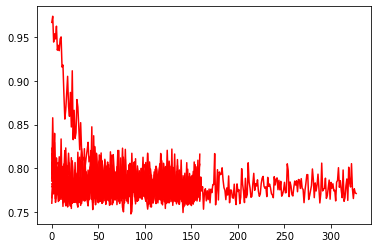

In [46]:
counter = 1
while True:
#def wrapped_do_run():

    queue_file = "queue/queue_" + str(counter) + ".txt"
    print("#" * 20 + " About to synthesize from file: "+ queue_file + " " + "#" * 20)

    #@title Do the Run!
    #@markdown `n_batches` ignored with animation modes.
    display_rate =  50 #@param{type: 'number'}
    n_batches =  50 #@param{type: 'number'}

    #Update Model Settings
    timestep_respacing = f'ddim{steps}'
    diffusion_steps = (1000//steps)*steps if steps < 1000 else steps
    model_config.update({
        'timestep_respacing': timestep_respacing,
        'diffusion_steps': diffusion_steps,
    })

    global batch_size
    batch_size = 1 

    def move_files(start_num, end_num, old_folder, new_folder):
        for i in range(start_num, end_num):
            old_file = old_folder + f'/{batch_name}({batchNum})_{i:04}.png'
            new_file = new_folder + f'/{batch_name}({batchNum})_{i:04}.png'
            os.rename(old_file, new_file)

    #@markdown ---

    global resume_run, run_to_resume, resume_from_frame, retain_overwritten_frames

    resume_run = False #@param{type: 'boolean'}
    run_to_resume = 'latest' #@param{type: 'string'}
    resume_from_frame = 'latest' #@param{type: 'string'}
    retain_overwritten_frames = False #@param{type: 'boolean'}
    if retain_overwritten_frames is True:
      retainFolder = f'{batchFolder}/retained'
      createPath(retainFolder)


    skip_step_ratio = int(frames_skip_steps.rstrip("%")) / 100
    calc_frames_skip_steps = math.floor(steps * skip_step_ratio)


    if steps <= calc_frames_skip_steps:
      sys.exit("ERROR: You can't skip more steps than your total steps")

    global batchNum, start_frame, frames_to_save
    if resume_run:
      if run_to_resume == 'latest':
        try:
          batchNum
        except:
          batchNum = len(glob(f"{batchFolder}/{batch_name}(*)_settings.txt"))-1
      else:
        batchNum = int(run_to_resume)
      if resume_from_frame == 'latest':
        start_frame = len(glob(batchFolder+f"/{batch_name}({batchNum})_*.png"))
        if animation_mode != '3D' and turbo_mode == True and start_frame > turbo_preroll and start_frame % int(turbo_steps) != 0:
          start_frame = start_frame - (start_frame % int(turbo_steps))
      else:
        start_frame = int(resume_from_frame)+1
        if animation_mode != '3D' and turbo_mode == True and start_frame > turbo_preroll and start_frame % int(turbo_steps) != 0:
          start_frame = start_frame - (start_frame % int(turbo_steps))
        if retain_overwritten_frames is True:
          existing_frames = len(glob(batchFolder+f"/{batch_name}({batchNum})_*.png"))
          frames_to_save = existing_frames - start_frame
          print(f'Moving {frames_to_save} frames to the Retained folder')
          move_files(start_frame, existing_frames, batchFolder, retainFolder)
    else:
      start_frame = 0
      batchNum = len(glob(batchFolder+"/*.txt"))
      while os.path.isfile(f"{batchFolder}/{batch_name}({batchNum})_settings.txt") is True or os.path.isfile(f"{batchFolder}/{batch_name}-{batchNum}_settings.txt") is True:
        batchNum += 1

    print(f'Starting Run: {batch_name}({batchNum}) at frame {start_frame}')

    if set_seed == 'random_seed':
        random.seed()
        seed = random.randint(0, 2**32)
        # print(f'Using seed: {seed}')
    else:
        seed = int(set_seed)

    args = load_args(queue_file)
    max_frames = args["max_frames"]
    args = {
        'batchNum': batchNum,
        'prompts_series':split_prompts(args["text_prompts"]) if text_prompts else None,
        'image_prompts_series':split_prompts(args["image_prompts"]) if image_prompts else None,
        'seed': seed,
        'display_rate':display_rate,
        'n_batches':n_batches if animation_mode == 'None' else 1,
        'batch_size':batch_size,
        'batch_name': batch_name,
        'steps': args["steps"],
        'diffusion_sampling_mode': diffusion_sampling_mode,
        'width_height': width_height,
        'clip_guidance_scale': clip_guidance_scale,
        'tv_scale': tv_scale,
        'range_scale': range_scale,
        'sat_scale': sat_scale,
        'cutn_batches': cutn_batches,
        'init_image': init_image,
        'init_scale': init_scale,
        'skip_steps': skip_steps,
        'side_x': side_x,
        'side_y': side_y,
        'timestep_respacing': timestep_respacing,
        'diffusion_steps': diffusion_steps,
        'animation_mode': animation_mode,
        'video_init_path': video_init_path,
        'extract_nth_frame': extract_nth_frame,
        'video_init_seed_continuity': video_init_seed_continuity,
        'key_frames': key_frames,
        'max_frames': args["max_frames"] if animation_mode != "None" else 1,
        'interp_spline': interp_spline,
        'start_frame': start_frame,
        'angle': angle,
        'zoom': zoom,
        'translation_x': translation_x,
        'translation_y': translation_y,
        'translation_z': translation_z,
        'rotation_3d_x': rotation_3d_x,
        'rotation_3d_y': rotation_3d_y,
        'rotation_3d_z': rotation_3d_z,
        'midas_depth_model': midas_depth_model,
        'midas_weight': midas_weight,
        'near_plane': near_plane,
        'far_plane': far_plane,
        'fov': fov,
        'padding_mode': padding_mode,
        'sampling_mode': sampling_mode,
        'angle_series':angle_series,
        'zoom_series':zoom_series,
        'translation_x_series':translation_x_series,
        'translation_y_series':translation_y_series,
        'translation_z_series':translation_z_series,
        'rotation_3d_x_series':rotation_3d_x_series,
        'rotation_3d_y_series':rotation_3d_y_series,
        'rotation_3d_z_series':rotation_3d_z_series,
        'frames_scale': frames_scale,
        'calc_frames_skip_steps': calc_frames_skip_steps,
        'skip_step_ratio': skip_step_ratio,
        'calc_frames_skip_steps': calc_frames_skip_steps,
        'text_prompts': args["text_prompts"],
        'image_prompts': args["image_prompts"],
        'cut_overview': eval(cut_overview),
        'cut_innercut': eval(cut_innercut),
        'cut_ic_pow': cut_ic_pow,
        'cut_icgray_p': eval(cut_icgray_p),
        'intermediate_saves': intermediate_saves,
        'intermediates_in_subfolder': intermediates_in_subfolder,
        'steps_per_checkpoint': steps_per_checkpoint,
        'perlin_init': perlin_init,
        'perlin_mode': perlin_mode,
        'set_seed': set_seed,
        'eta': eta,
        'clamp_grad': clamp_grad,
        'clamp_max': clamp_max,
        'skip_augs': skip_augs,
        'randomize_class': randomize_class,
        'clip_denoised': clip_denoised,
        'fuzzy_prompt': fuzzy_prompt,
        'rand_mag': rand_mag,
    }

    args = SimpleNamespace(**args)

    print('Prepping model...')
    global model, diffusion
    model, diffusion = create_model_and_diffusion(**model_config)
    model.load_state_dict(torch.load(f'{model_path}/{diffusion_model}.pt', map_location='cpu'))
    model.requires_grad_(False).eval().to(device)
    for name, param in model.named_parameters():
        if 'qkv' in name or 'norm' in name or 'proj' in name:
            param.requires_grad_()
    if model_config['use_fp16']:
        model.convert_to_fp16()

    counter += 1
    gc.collect()
    torch.cuda.empty_cache()
    try:
      do_run()
    except KeyboardInterrupt:
        pass
    finally:
        print('Seed used:', seed)
        gc.collect()
        torch.cuda.empty_cache()
    
    wrapped_create_video()

In [30]:
example = load_args("queue/queue_2.txt")

In [31]:
example

{'text_prompts': {'0': ['POV DMT trip']},
 'image_prompts': {},
 'max_frames': 12,
 'seed': 2154472775,
 'steps': 100}

Frames:   0%|          | 0/10 [00:00<?, ?it/s]

translation_x: 0.0 translation_y: 0.0 translation_z: 10.0 rotation_3d_x: 0.0 rotation_3d_y: 0.0 rotation_3d_z: 0.0
translation: [-0.0, 0.0, -0.05]
rotation: [0.0, 0.0, 0.0]
rot_mat: tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]], device='cuda:0')
Running AdaBins depth estimation implementation...
Loading base model ()...

Using cache found in /home/mohamad/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.
Running MiDaS depth estimation implementation...
Finished depth estimation.
None
Frame 9 Prompt: ['The fear of dolls, trending on artstation']



Output()

  0%|          | 0/40 [00:00<?, ?it/s]

Seed used: 3104574173
Total frames: 10
The video is ready and saved to the images folder


ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.3.0 (GCC)
  configuration: --prefix=/home/mohamad/anaconda3/envs/pytorch_110 --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc

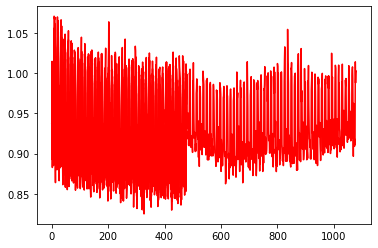

In [25]:
wrapped_do_run()
wrapped_create_video()